e)

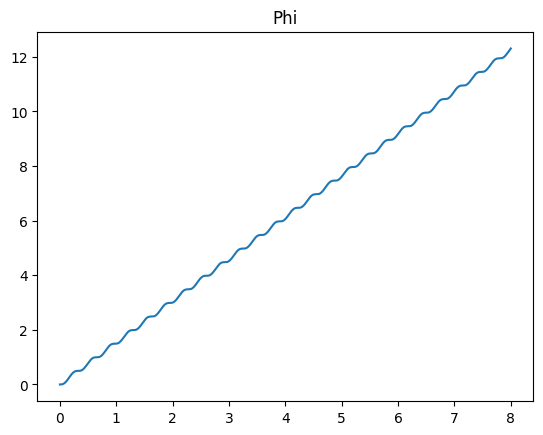

In [38]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep


def model(y, t, m=0.1, r=0.1, d=0.3, g=9.81, dpsi=400):

    I0=0.25*m*r**2  + m*d**2
    Iz=0.5*m*r**2

    phi=y[0]
    psi=y[1]
    theta=y[2]
    dd=y[3]


    dphi= (Iz*dpsi*(np.cos(0.25*np.pi)-np.cos(theta)))/(I0*np.sin(theta)**2+Iz*np.cos(theta)**2)
    dpsi= dpsi
    dtheta=dd
    ddtheta=  1/(I0) * (dphi**2 *(np.sin(theta)*np.cos(theta))*(I0-Iz)- dphi*dpsi*Iz*np.sin(theta)\
                     + m*g*d*np.sin(theta) )

    return [dphi,dpsi,dtheta,ddtheta]

y0 = [0, 0, (np.pi/4), 0]

t = np.linspace(0, 8, 1000)

solution = odeint(model, y0, t)

# solution for each variable
y1_solution = solution[:, 0]
y2_solution = solution[:, 1]
y3_solution = solution[:, 2]
y4_solution = solution[:, 3]


plt.plot(t, y1_solution, label='y1')
plt.title('Phi')
plt.show()

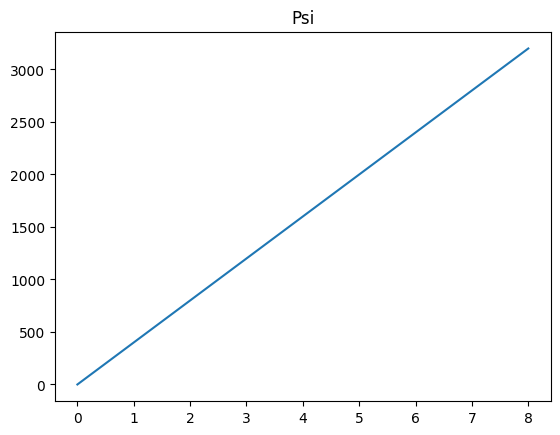

In [39]:
plt.plot(t, y2_solution, label='y1')
plt.title('Psi')
plt.show()

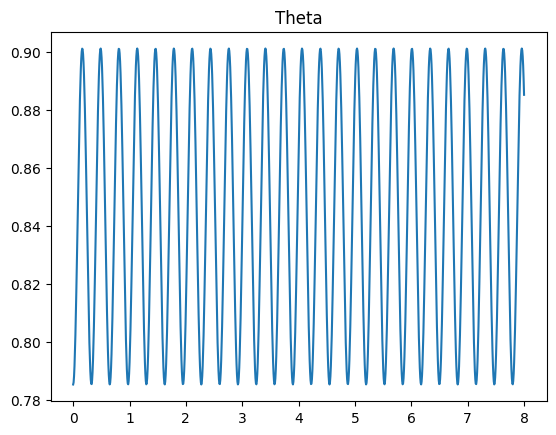

In [40]:
plt.plot(t, y3_solution, label='y1')
plt.title('Theta')
plt.show()

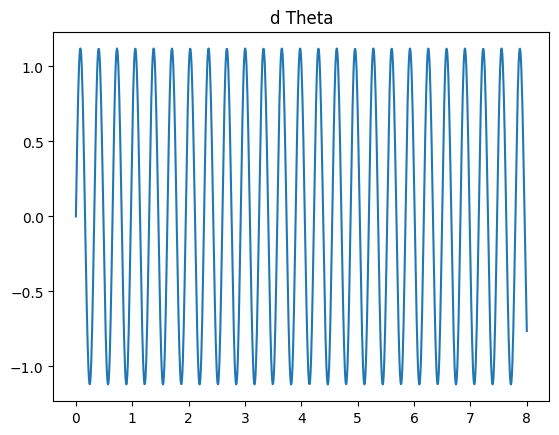

In [41]:
plt.plot(t, y4_solution, label='y1')
plt.title('d Theta')
plt.show()

In [42]:
position=np.zeros([len(t),3])

for i in range(len(t)):
    position[i,0]=0.3*np.sin(solution[:,2][i])*np.cos(solution[:,0][i])
    position[i,1]=0.3*np.sin(solution[:,2][i])*np.sin(solution[:,0][i])
    position[i,2]=0.3*np.cos(solution[:,2][i])

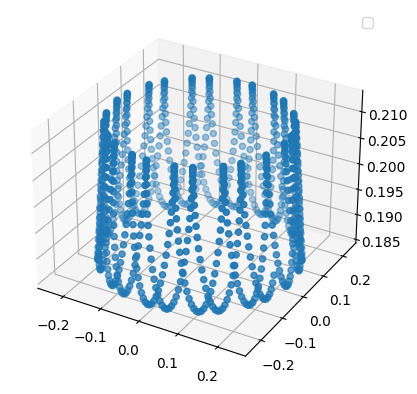

In [43]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(position[:, 0], position[:, 1], position[:, 2])
ax.legend()

f)

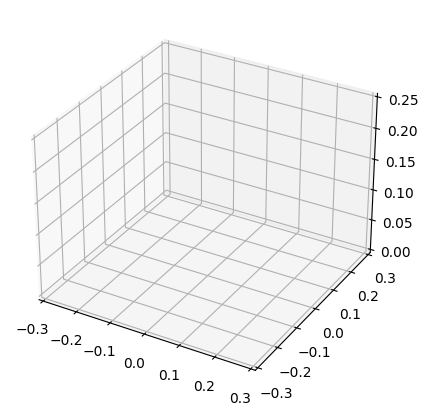

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')
scale=35

def init():

    ax.clear()
    ax.set_xlim(-0.3,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_zlim(0,0.25)

def Update(i):
    init()
    x = position[::scale][i,0]
    y = position[::scale][i,1]
    z = position[::scale][i,2]

    xx=position[::scale][:i,0]
    yy=position[::scale][:i,1]
    zz=position[::scale][:i,2]
    if i<=1000:
      ax.plot(xx, yy, zz,'.-', lw=1, ms=2,c="r")
    else:
      ax.plot(xx[i-30:i], yy[i-30:i], zz[i-30:i],'.-', lw=1, ms=2,c="r")
    ax.scatter(x,y,z,c="b")
    ax.plot([0,x], [0,y],[0,z], 'o-', lw=2,c="b")
    ax.set_title(r't={:.3f}s'.format(t[::scale][i]))

Animation = anim.FuncAnimation(fig,Update,frames=len(t[::scale]),init_func=init)

g)

In [ ]:
def posicion2pi(lista):
    n = 2 * np.pi
    dminima = abs(lista[0] - n)
    ncercano = lista[0]
    for i in lista:
        d = abs(i - n)
        if d < dminima:
            dminima = d
            ncercano = i
    return np.where(lista==ncercano)
valor=posicion2pi(solution[:,0])
valor

(array([51]),)

In [ ]:
T_precesion=2*np.pi/t[valor]
T_precesion

array([1.52459643])